<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Homework 2**



In [311]:
from __future__ import print_function
#__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize


    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


Chisq mean: 100.09, standard deviation: 13.24


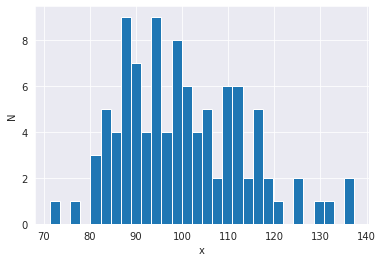

In [312]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
#distributions = ['chisq']
mymean = 100
import numpy as np
np.random.seed(456)  #forse serve per la riproducibiltà
md = {}
df = mymean
md['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')


print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))#

#md['pois'] = np.random.poisson(df, size=100)
#pl.hist(md['pois'], bins = 30)
#pl.ylabel('N')
#pl.xlabel('x')



In [313]:
np.array(range(1, 100))
#mysize = (2000 / (np.array(range(1, 100))))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [314]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

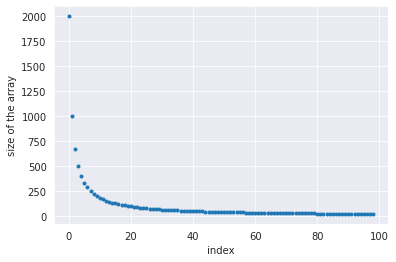

In [315]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

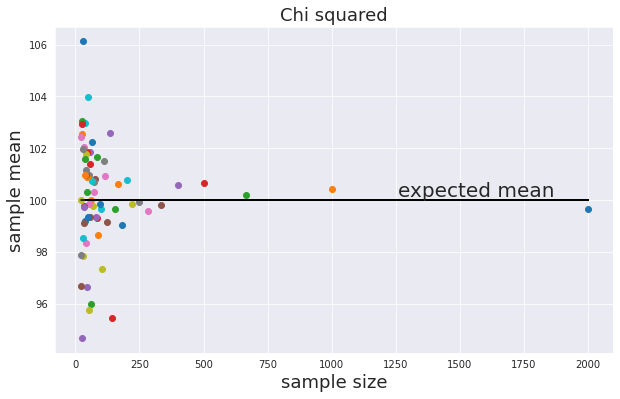

In [316]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Acoording to the law of large number in the limit of N -> infinity

the mean of a sample of size Ν approaches the mean of the population μ

Text(0, 0.5, 'N')

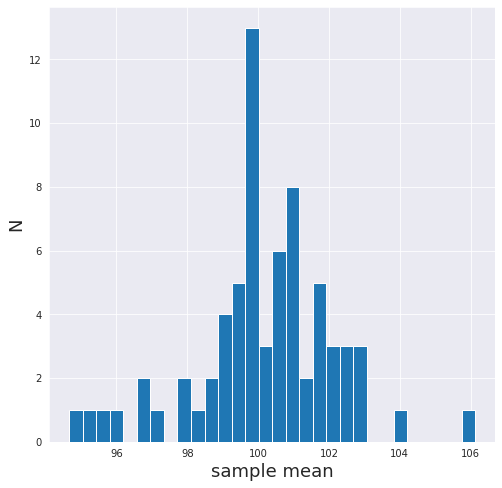

In [317]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

##Poisson Distribution

Text(0.5, 0, 'x')

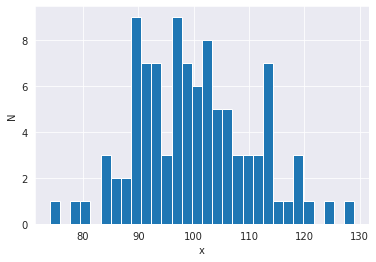

In [318]:
mymean = 100
import numpy as np
np.random.seed(456)  #forse serve per la riproducibiltà
md = {}
df = mymean
md['pois'] = np.random.poisson(df, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')


In [319]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 99.90, standard deviation: 10.46


In [320]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(1259.3999999999999, 100, 'expected mean')

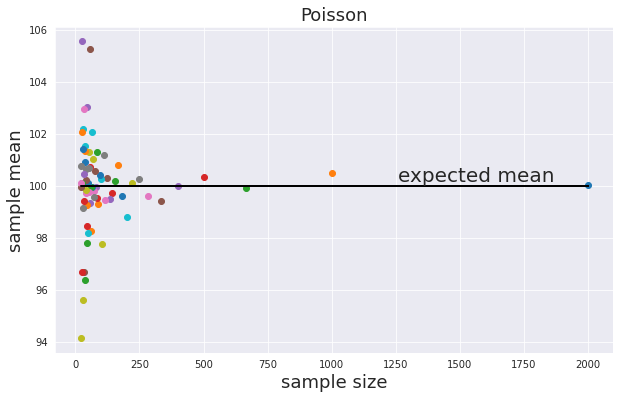

In [321]:
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Acoording to the law of large number in the limit of N -> infinity

the mean of a sample of size Ν approaches the mean of the population μ

Text(0, 0.5, 'N')

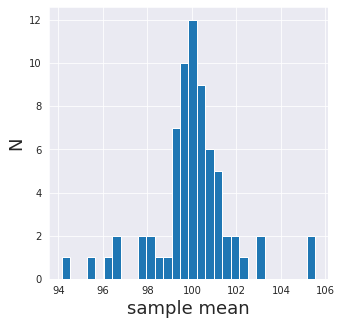

In [322]:

allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)


##Normal distribution

Text(0.5, 0, 'x')

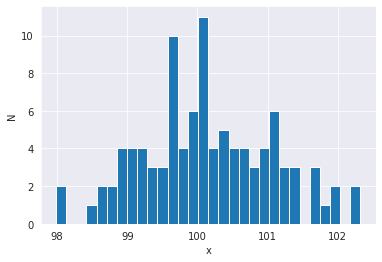

In [323]:
mymean = 100
import numpy as np
np.random.seed(456)  #forse serve per la riproducibiltà
md = {}
df = mymean
md['gaus'] = np.random.normal(df, size=100)
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [324]:
print ("Gaussian mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Gaussian mean: 100.14, standard deviation: 0.92


In [325]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(1259.3999999999999, 100, 'expected mean')

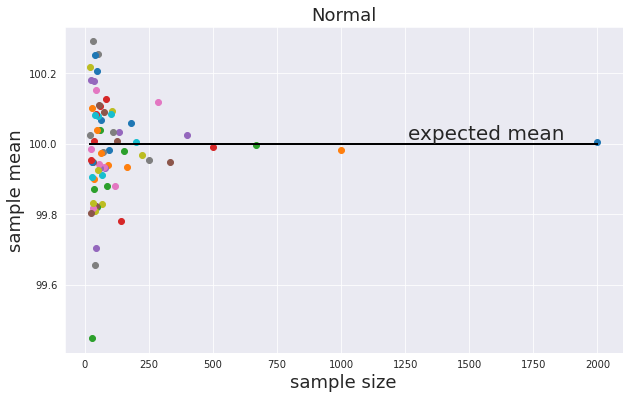

In [326]:
md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Acoording to the law of large number in the limit of N -> infinity

the mean of a sample of size Ν approaches the mean of the population μ

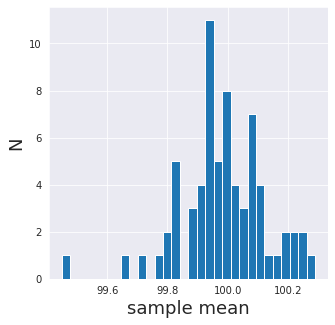

In [327]:
allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)


#voglio fittare una gaussiana sulla distribuzione delle medie
def mygauss(x, mu, sig):
  return 1/np.sqrt(2*np.pi*sig**2) * (np.exp(-(x-mu)**2/2/sig**2))

x = np.arange(150);
mu = 100 
sig = 10
mygauss(x, mu, sig);
#pl.plot(x, mygauss(x, mu, sig))



##Binomial distribution

In [328]:
import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['binomial']
mymean = 100

Populating the interactive namespace from numpy and matplotlib


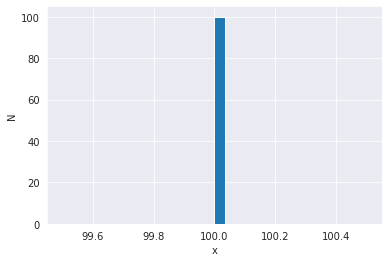

In [329]:
import numpy as np

np.random.seed(456)
md = {}

# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['binomial'] = np.random.binomial(df, p = 100/df , size=100)  
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [330]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 100.00, standard deviation: 0.00


In [331]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

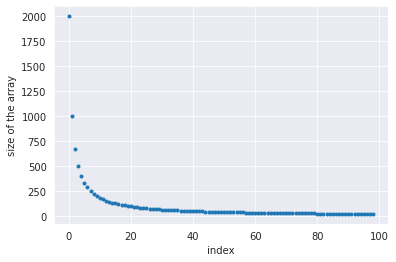

In [332]:

pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

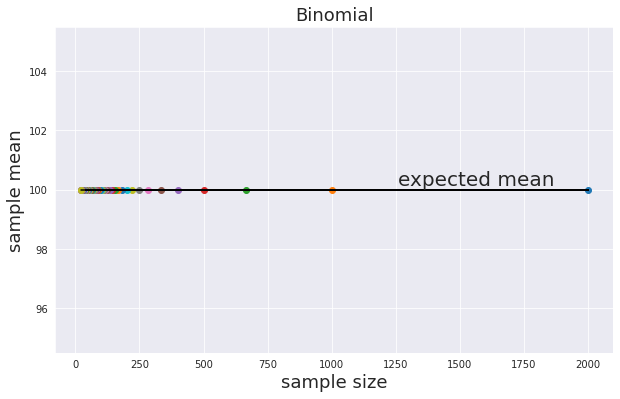

In [333]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(df, p=100/df, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Acoording to the law of large number in the limit of N -> infinity

the mean of a sample of size Ν approaches the mean of the population μ

## Cauchy distribution

Text(0.5, 0, 'x')

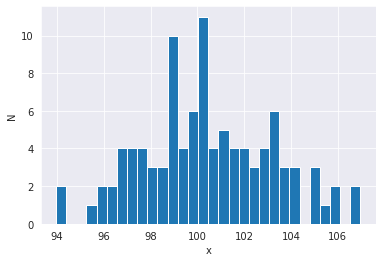

In [334]:
mymean = 100
import numpy as np
import scipy.stats as stats
np.random.seed(456)  #forse serve per la riproducibiltà
md = {}
df = mymean
md['cauchy'] = stats.norm.rvs(loc=100, scale=3, size=100) #non standard cauchy 
                                                          #distribution (centro 
                                                          #diverso da zero)
pl.hist(md['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [335]:
print ("Cauchy mean: %.2f, standard deviation: %.2f"%(md['cauchy'].mean(), md['cauchy'].std()))


Cauchy mean: 100.43, standard deviation: 2.76


In [336]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

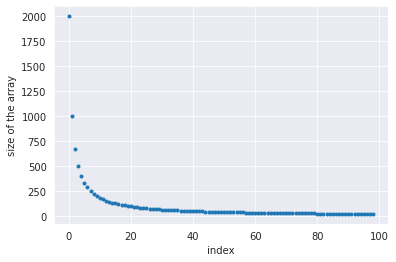

In [337]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

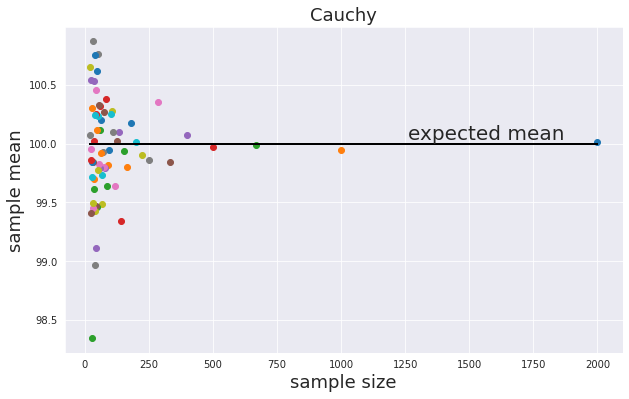

In [338]:
md['cauchy'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['cauchy'][n] = stats.norm.rvs(loc=100, scale=3, size = n)
    
# save the means for plotting later    

md['cauchy']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['cauchy']:
    if not type(nn) == str:
        md['cauchy']['means'][nn] = md['cauchy'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['cauchy']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Cauchy', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Acoording to the law of large number in the limit of N -> infinity

the mean of a sample of size Ν approaches the mean of the population μ

Text(0, 0.5, 'N')

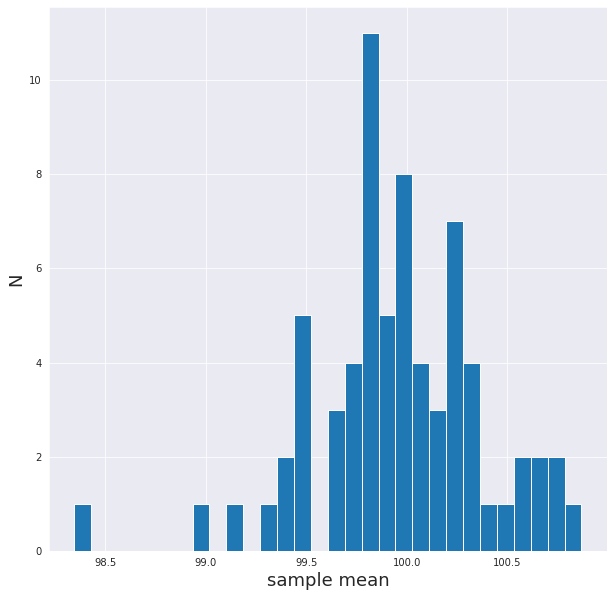

In [339]:
allmeans = list(md['cauchy']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)